# Adaptado do Adesso

## Vídeos antigos
* [Adesso2-mmd-1-9 (76min)](https://www.loom.com/share/a8373d5d902a4317820c8c7ef31d5524), após 53min


In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2, requests, sys
import numpy as np

In [ ]:
# download _morph.py from drive
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1FlMtAkb0npwmD54aCysLsxB84PehcKMe

In [3]:
from _morph import *

# mmdblob

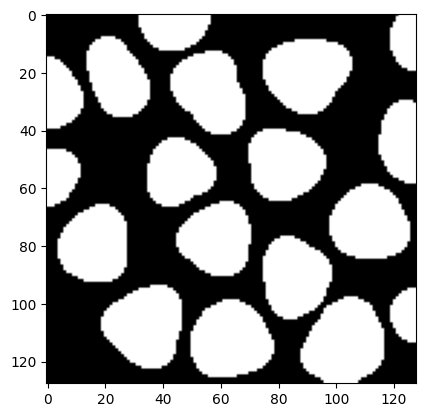

In [4]:
img = mm.read('https://drive.google.com/file/d/1F0Uq_f9hKWWHlCbD5CLw57hl5i48jXek/view?usp=sharing')
f = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY) # converte para grayscale
f = mm.threshold(f)
mm.show(f)  

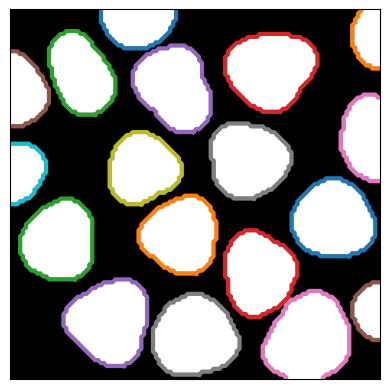

In [5]:
mm.lblshow(f)

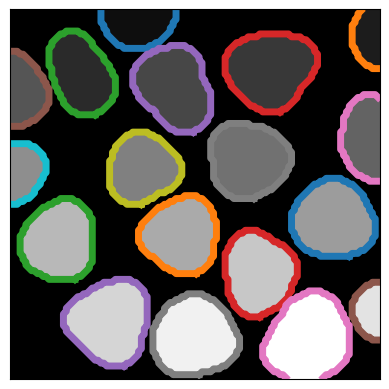

In [6]:
labels = mm.label(f)
mm.lblshow(labels,5)

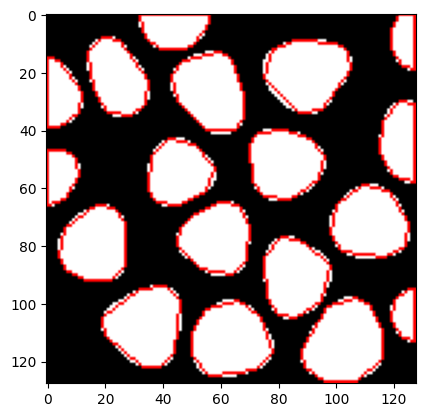

In [23]:
_=mm.blob(f,'poly',1,0.02)

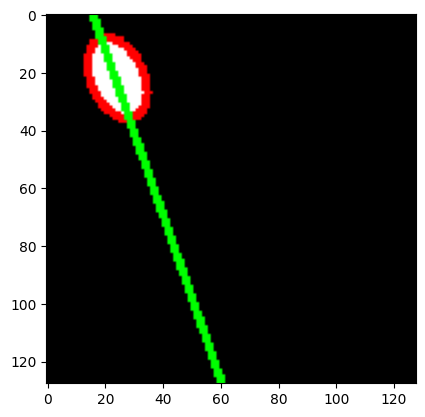

In [25]:
aux = np.zeros_like(labels).astype('uint8')
aux[labels==3] = 255
_=mm.blob(aux,'line',2)

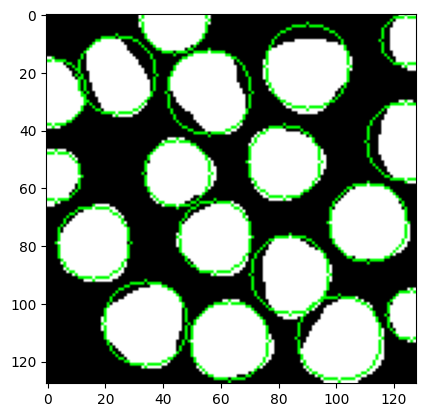

In [9]:
_=mm.blob(f,'circle')

In [10]:
measures_all = ['textLabel','textArea','textPer','box','rect',
            'circle','ellipse','convex','poly', 'line']
measures_vect = {k:[] for k in measures_all}
for i in range(np.amax(labels)):
  for m in measures_all:
    aux = np.zeros_like(labels).astype('uint8')
    aux[labels==i] = 255
    measures_vect[m].append(mm.blob(aux,m,1,0.01,False)[0])

In [11]:
# ou, usando esse código em blobAll:
measures_vect = mm.blobAll(f)

In [26]:
print(measures_vect['textArea'][1])
print(measures_vect['textPer'][1])
print(measures_vect['box'][1])

235
64
[[32  0]
 [56  0]
 [56 12]
 [32 12]]


In [13]:
print(*measures_vect['textArea'])

648 235 128 414 571 518 217 274 495 402 164 532 474 487 490 568 113 568


In [14]:
indiceMin = measures_vect['textArea'].index(min(measures_vect['textArea']))
indiceMin

16

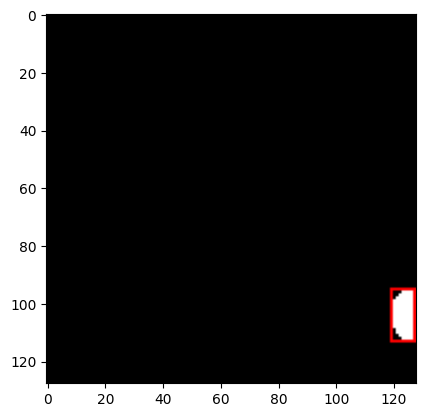

In [15]:
aux = np.zeros_like(labels).astype('uint8')
aux[labels==indiceMin] = 255
_=mm.blob(aux,'box',1)

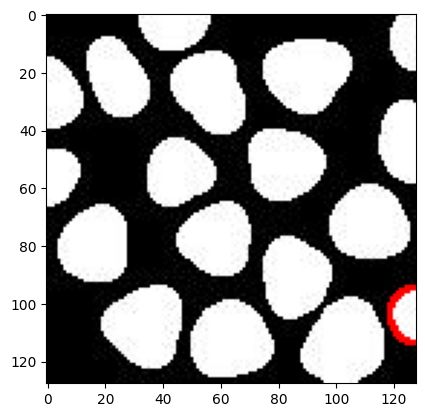

In [16]:
mm.show(img,mm.gradm(aux))